In [70]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
#from tensorflow.keras import layers
#need tensorflow gpu 

In [46]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)



Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [74]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df1 = create_dataset(pwd, 'ohe') 
print("Done")# Depuis le script Exctract_features
display(df)

Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized and will be ignored.
Amino acid '
' not recognized a

/home/ygouzy/Documents/GitHub/MLP_avec_Taveau/Exctract_features.py:139: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['DSSP'] = y_resampled


0         1         2         3         4         5         6  \
0       0.000000  0.153846  0.153846  0.153846  0.076923  0.000000  0.000000   
1       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
2       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
3       0.076923  0.076923  0.153846  0.076923  0.076923  0.000000  0.000000   
4       0.076923  0.076923  0.153846  0.076923  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
112081  0.153846  0.016467  0.000000  0.000000  0.060457  0.153846  0.060457   
112082  0.076923  0.000000  0.000000  0.000000  0.000000  0.000000  0.002359   
112083  0.094652  0.000000  0.076923  0.230769  0.000000  0.000000  0.000000   
112084  0.190907  0.076923  0.000000  0.000000  0.000000  0.230769  0.039862   
112085  0.076923  0.013268  0.013268  0.000000  0.013268  0.000000  0.000000   

               7         8         9  ...   11   12        13        14  \
0       0.076923  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
1       0.076923  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
2       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
3       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
4       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
...          ...       ...       ...  ...  ...  ...       ...       ...   
112081  0.076923  0.076923  0.000000  ...  0.0  0.0  0.000000  0.000000   
112082  0.000000  0.000000  0.000000  ...  0.0  0.0  0.230769  0.153846   
112083  0.000000  0.076923  0.076923  ...  0.0  0.0  0.153846  0.076923   
112084  0.039862  0.076923  0.037061  ...  0.0  0.0  0.039862  0.000000   
112085  0.063655  0.000000  0.000000  ...  0.0  0.0  0.000000  0.294424   

              15        16        17        18        19  DSSP  
0       0.000000  0.153846  0.000000  0.076923  0.076923     2  
1       0.000000  0.230769  0.000000  0.076923  0.076923     2  
2       0.000000  0.153846  0.000000  0.076923  0.076923     2  
3       0.000000  0.153846  0.000000  0.076923  0.076923     2  
4       0.076923  0.153846  0.000000  0.076923  0.076923     2  
...          ...       ...       ...       ...       ...   ...  
112081  0.076923  0.153846  0.000000  0.000000  0.170313     1  
112082  0.153846  0.076923  0.000000  0.153846  0.151487     1  
112083  0.000000  0.136117  0.000000  0.000000  0.000000     1  
112084  0.076923  0.000000  0.000000  0.000000  0.037061     1  
112085  0.076923  0.217501  0.013268  0.000000  0.063655     1  

[112086 rows x 21 columns]

In [75]:
x = df1.drop('DSSP', axis=1)
y = df1['DSSP']
display(x)
display(y)

0    1    2    3    4    5    6    7    8    9    ...  250  251  252  \
0         0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112081    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112082    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112083    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112084    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112085    0    0    0    0    0    0    0    0    0    0  ...    1    0    0   

        253  254  255  256  257  258  259  
0         0    0    0    1    0    0    0  
1         0    0    0    1    0    0    0  
2         0    0    0    0    0    0    0  
3         0    0    0    0    0    0    0  
4         0    0    1    0    0    0    0  
...     ...  ...  ...  ...  ...  ...  ...  
112081    0    0    0    0    0    0    0  
112082    0    0    0    0    0    0    0  
112083    0    0    0    0    0    0    0  
112084    0    0    0    0    0    0    0  
112085    0    0    0    0    0    0    0  

[112086 rows x 260 columns]

0         2
1         2
2         2
3         2
4         2
         ..
112081    1
112082    1
112083    1
112084    1
112085    1
Name: DSSP, Length: 112086, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min')

In [63]:
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),  
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history_1 = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(X_test, y_test_one_hot),callbacks=early_stopping)
# Function to plot training and validation loss
def plot_loss(history_1, title="Loss Curve"):
    plt.figure(figsize=(8, 6))
    plt.plot(history_1.history_1['loss'], label='Training Loss')
    plt.plot(history_1.history_1['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot_loss function with the captured history
plot_loss(history_1, title="Training and Validation Loss")

Epoch 1/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9459 - loss: 0.1460 - val_accuracy: 0.7930 - val_loss: 0.7043
Epoch 2/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9488 - loss: 0.1380 - val_accuracy: 0.7939 - val_loss: 0.7648
Epoch 3/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9538 - loss: 0.1281 - val_accuracy: 0.8014 - val_loss: 0.7158
Epoch 4/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9563 - loss: 0.1194 - val_accuracy: 0.7965 - val_loss: 0.7792
Epoch 5/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9581 - loss: 0.1153 - val_accuracy: 0.7974 - val_loss: 0.8012
Epoch 6/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9592 - loss: 0.1117 - val_accuracy: 0.7995 - val_loss: 0.8182
Epoch 6: early stopping


In [76]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7913 - loss: 0.7485
Loss: 0.7607, Accuracy: 79.0748


701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


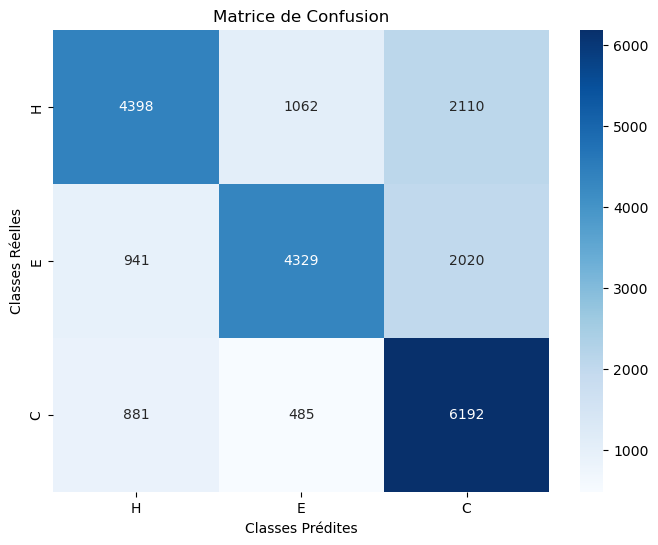

In [65]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [66]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df2 = create_dataset(pwd, 'freq') # Depuis le script Exctract_features
display(df2)

0         1         2         3         4         5         6  \
0       0.000000  0.153846  0.153846  0.153846  0.076923  0.000000  0.000000   
1       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
2       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
3       0.076923  0.076923  0.153846  0.076923  0.076923  0.000000  0.000000   
4       0.076923  0.076923  0.153846  0.076923  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
112081  0.153846  0.016467  0.000000  0.000000  0.060457  0.153846  0.060457   
112082  0.076923  0.000000  0.000000  0.000000  0.000000  0.000000  0.002359   
112083  0.094652  0.000000  0.076923  0.230769  0.000000  0.000000  0.000000   
112084  0.190907  0.076923  0.000000  0.000000  0.000000  0.230769  0.039862   
112085  0.076923  0.013268  0.013268  0.000000  0.013268  0.000000  0.000000   

               7         8         9  ...   11   12        13        14  \
0       0.076923  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
1       0.076923  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
2       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
3       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
4       0.153846  0.000000  0.076923  ...  0.0  0.0  0.000000  0.000000   
...          ...       ...       ...  ...  ...  ...       ...       ...   
112081  0.076923  0.076923  0.000000  ...  0.0  0.0  0.000000  0.000000   
112082  0.000000  0.000000  0.000000  ...  0.0  0.0  0.230769  0.153846   
112083  0.000000  0.076923  0.076923  ...  0.0  0.0  0.153846  0.076923   
112084  0.039862  0.076923  0.037061  ...  0.0  0.0  0.039862  0.000000   
112085  0.063655  0.000000  0.000000  ...  0.0  0.0  0.000000  0.294424   

              15        16        17        18        19  DSSP  
0       0.000000  0.153846  0.000000  0.076923  0.076923     2  
1       0.000000  0.230769  0.000000  0.076923  0.076923     2  
2       0.000000  0.153846  0.000000  0.076923  0.076923     2  
3       0.000000  0.153846  0.000000  0.076923  0.076923     2  
4       0.076923  0.153846  0.000000  0.076923  0.076923     2  
...          ...       ...       ...       ...       ...   ...  
112081  0.076923  0.153846  0.000000  0.000000  0.170313     1  
112082  0.153846  0.076923  0.000000  0.153846  0.151487     1  
112083  0.000000  0.136117  0.000000  0.000000  0.000000     1  
112084  0.076923  0.000000  0.000000  0.000000  0.037061     1  
112085  0.076923  0.217501  0.013268  0.000000  0.063655     1  

[112086 rows x 21 columns]

In [67]:
x = df2.drop('DSSP', axis=1)
y = df2['DSSP']
display(x)
display(y)

0         1         2         3         4         5         6  \
0       0.000000  0.153846  0.153846  0.153846  0.076923  0.000000  0.000000   
1       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
2       0.000000  0.076923  0.153846  0.153846  0.076923  0.000000  0.000000   
3       0.076923  0.076923  0.153846  0.076923  0.076923  0.000000  0.000000   
4       0.076923  0.076923  0.153846  0.076923  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
112081  0.153846  0.016467  0.000000  0.000000  0.060457  0.153846  0.060457   
112082  0.076923  0.000000  0.000000  0.000000  0.000000  0.000000  0.002359   
112083  0.094652  0.000000  0.076923  0.230769  0.000000  0.000000  0.000000   
112084  0.190907  0.076923  0.000000  0.000000  0.000000  0.230769  0.039862   
112085  0.076923  0.013268  0.013268  0.000000  0.013268  0.000000  0.000000   

               7         8         9        10   11   12        13        14  \
0       0.076923  0.000000  0.076923  0.000000  0.0  0.0  0.000000  0.000000   
1       0.076923  0.000000  0.076923  0.000000  0.0  0.0  0.000000  0.000000   
2       0.153846  0.000000  0.076923  0.000000  0.0  0.0  0.000000  0.000000   
3       0.153846  0.000000  0.076923  0.000000  0.0  0.0  0.000000  0.000000   
4       0.153846  0.000000  0.076923  0.000000  0.0  0.0  0.000000  0.000000   
...          ...       ...       ...       ...  ...  ...       ...       ...   
112081  0.076923  0.076923  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
112082  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.230769  0.153846   
112083  0.000000  0.076923  0.076923  0.076923  0.0  0.0  0.153846  0.076923   
112084  0.039862  0.076923  0.037061  0.153846  0.0  0.0  0.039862  0.000000   
112085  0.063655  0.000000  0.000000  0.153846  0.0  0.0  0.000000  0.294424   

              15        16        17        18        19  
0       0.000000  0.153846  0.000000  0.076923  0.076923  
1       0.000000  0.230769  0.000000  0.076923  0.076923  
2       0.000000  0.153846  0.000000  0.076923  0.076923  
3       0.000000  0.153846  0.000000  0.076923  0.076923  
4       0.076923  0.153846  0.000000  0.076923  0.076923  
...          ...       ...       ...       ...       ...  
112081  0.076923  0.153846  0.000000  0.000000  0.170313  
112082  0.153846  0.076923  0.000000  0.153846  0.151487  
112083  0.000000  0.136117  0.000000  0.000000  0.000000  
112084  0.076923  0.000000  0.000000  0.000000  0.037061  
112085  0.076923  0.217501  0.013268  0.000000  0.063655  

[112086 rows x 20 columns]

0         2
1         2
2         2
3         2
4         2
         ..
112081    1
112082    1
112083    1
112084    1
112085    1
Name: DSSP, Length: 112086, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [69]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history = model.fit(X_train, y_train_one_hot, 
                    epochs=40, 
                    batch_size=32, 
                    validation_data=(X_test, y_test_one_hot), 
                    callbacks=early_stopping)


In [ ]:
# Function to plot training and validation loss
def plot_loss(history, title="Loss Curve"):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot_loss function with the captured history
plot_loss(history, title="Training and Validation Loss")

In [43]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7866 - loss: 1.0647
Loss: 1.0672, Accuracy: 78.7804


701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step


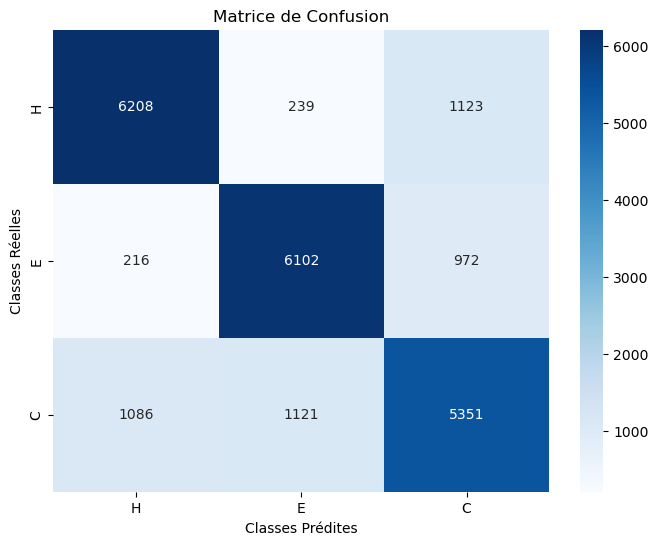

In [44]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()